# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import time 

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#creating placeholder city list
#cities_fake = ['New York','Boston']
#print(cities_fake)

In [29]:
count = 1
sets = 1
url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key
citydata = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city +"&units=" + "imperial"
    cityresponse = requests.get(city_url).json()    
    try:
        print(f'Processing Record {count} of Set {sets} | {city}')

        latitude = cityresponse["coord"]["lat"]
        maxtemp = cityresponse["main"]["temp_max"]
        humidity = cityresponse["main"]["humidity"]
        cloudiness = cityresponse["clouds"]["all"]
        windspeed = cityresponse["wind"]["speed"]
        citydata.append({"City": city,
                          "Latitude": latitude,
                          "Max Temp": maxtemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": windspeed})
        
    except:
        print("City not found. Skipping...")
    count += 1
    if count == 51:
        sets += 1
        count = 0
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | stromness
Processing Record 6 of Set 1 | paramonga
Processing Record 7 of Set 1 | qixia
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | brejo santo
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | berdigestyakh
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | grand gaube
Processing Record 19 of Set 1 | zemio
Processing Record 20 of Set 1 | 

Processing Record 33 of Set 4 | torbay
Processing Record 34 of Set 4 | pevek
Processing Record 35 of Set 4 | farap
Processing Record 36 of Set 4 | hilton head island
Processing Record 37 of Set 4 | carnarvon
Processing Record 38 of Set 4 | abu dhabi
Processing Record 39 of Set 4 | sehithwa
Processing Record 40 of Set 4 | sinnamary
Processing Record 41 of Set 4 | paradwip
City not found. Skipping...
Processing Record 42 of Set 4 | barranca
Processing Record 43 of Set 4 | havre-saint-pierre
Processing Record 44 of Set 4 | cap malheureux
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | batsfjord
Processing Record 47 of Set 4 | rocha
Processing Record 48 of Set 4 | sosnovo-ozerskoye
Processing Record 49 of Set 4 | lukuledi
Processing Record 50 of Set 4 | orlik
Processing Record 0 of Set 5 | cayenne
Processing Record 1 of Set 5 | caluquembe
Processing Record 2 of Set 5 | carlagan
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | shitanjing
Processing

Processing Record 22 of Set 8 | kem
Processing Record 23 of Set 8 | narsaq
Processing Record 24 of Set 8 | lake cowichan
Processing Record 25 of Set 8 | kangaatsiaq
Processing Record 26 of Set 8 | americus
Processing Record 27 of Set 8 | lolua
City not found. Skipping...
Processing Record 28 of Set 8 | kastamonu
Processing Record 29 of Set 8 | sandwick
Processing Record 30 of Set 8 | taltal
Processing Record 31 of Set 8 | byron bay
Processing Record 32 of Set 8 | alberton
Processing Record 33 of Set 8 | kaoma
Processing Record 34 of Set 8 | tinskoy
Processing Record 35 of Set 8 | olinda
Processing Record 36 of Set 8 | skibbereen
Processing Record 37 of Set 8 | nago
Processing Record 38 of Set 8 | tongling
Processing Record 39 of Set 8 | ketchikan
Processing Record 40 of Set 8 | santa cruz
Processing Record 41 of Set 8 | alakurtti
Processing Record 42 of Set 8 | sapozhok
Processing Record 43 of Set 8 | moose factory
Processing Record 44 of Set 8 | nguiu
City not found. Skipping...
Proce

Processing Record 8 of Set 12 | nieuw amsterdam
Processing Record 9 of Set 12 | aras
Processing Record 10 of Set 12 | sambava
Processing Record 11 of Set 12 | cooma
Processing Record 12 of Set 12 | xinmin
Processing Record 13 of Set 12 | nome
Processing Record 14 of Set 12 | dieppe bay
City not found. Skipping...
Processing Record 15 of Set 12 | young
Processing Record 16 of Set 12 | lavrentiya
Processing Record 17 of Set 12 | ruteng
Processing Record 18 of Set 12 | petauke
Processing Record 19 of Set 12 | bulaevo
Processing Record 20 of Set 12 | kashary
Processing Record 21 of Set 12 | saint-francois
Processing Record 22 of Set 12 | meyungs
City not found. Skipping...
Processing Record 23 of Set 12 | amiens
Processing Record 24 of Set 12 | okha
Processing Record 25 of Set 12 | wageningen
Processing Record 26 of Set 12 | port hedland
Processing Record 27 of Set 12 | qujing
Processing Record 28 of Set 12 | haimen
Processing Record 29 of Set 12 | shimoda
Processing Record 30 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
city_df = pd.DataFrame(citydata)
city_df = city_df [["City","Cloudiness","Humidity","Latitude","Max Temp","Wind Speed"]]
city_df

City  Cloudiness  Humidity  Latitude  Max Temp  Wind Speed
0       okhotsk          68        77     59.38     21.20        5.66
1     hithadhoo          61        72     -0.60     84.02        9.73
2        avarua         100        83    -21.21     82.40        8.05
3     stromness         100        93     58.97     44.60       16.11
4     paramonga          44        91    -10.67     71.42       13.56
..          ...         ...       ...       ...       ...         ...
576  leeuwarden          26        55     53.20     37.40        5.82
577       jinka          30        72      5.65     69.80        4.34
578      koslan           0        93     63.46     15.08        6.38
579   ostersund         100        59     63.18     35.60       18.34
580     kabompo          31        98    -13.59     59.72        4.47

[581 rows x 6 columns]

In [31]:
city_df['City'] = city_df['City'].str.capitalize() 
city_df.head()

City  Cloudiness  Humidity  Latitude  Max Temp  Wind Speed
0    Okhotsk          68        77     59.38     21.20        5.66
1  Hithadhoo          61        72     -0.60     84.02        9.73
2     Avarua         100        83    -21.21     82.40        8.05
3  Stromness         100        93     58.97     44.60       16.11
4  Paramonga          44        91    -10.67     71.42       13.56

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

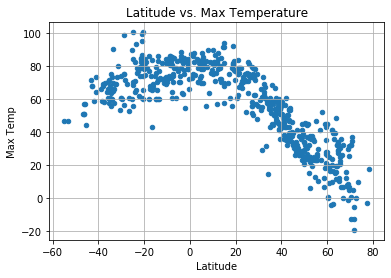

In [32]:
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude vs. Max Temperature",grid = True)
plt.savefig("Max_Temp_vs_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

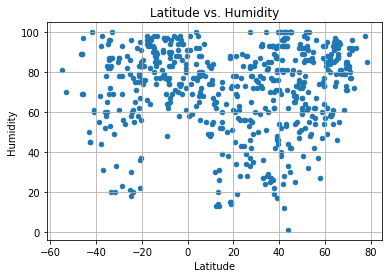

In [33]:
city_df.plot(x = 'Latitude',y = 'Humidity',kind ='scatter',title="Latitude vs. Humidity",grid = True)
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

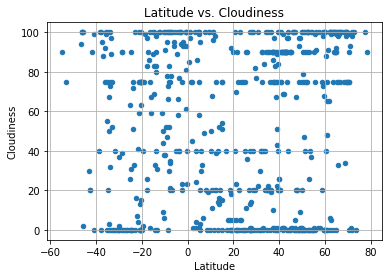

In [34]:
city_df.plot(x = 'Latitude',y = 'Cloudiness',kind ='scatter',title="Latitude vs. Cloudiness",grid = True)
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

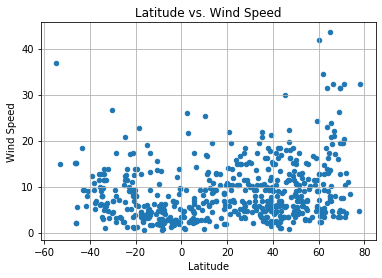

In [35]:
city_df.plot(x = 'Latitude',y = 'Wind Speed',kind ='scatter',title="Latitude vs. Wind Speed",grid = True)
plt.savefig("Wind Speed_vs_Latitude.png")
plt.show()

## Linear Regression

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots

In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) > 0, :]
southern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.11x + 91.37
The r-squared is: -0.8940255629661287
The regression displays a negative correlation.
In the nothern hemisphere, temperature decreases as you move away from the equator.


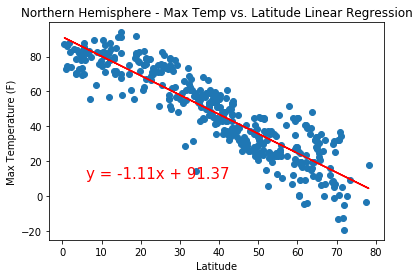

In [38]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, temperature decreases as you move away from the equator.")
plt.savefig("NH_Max Temp_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 80.92
The r-squared is: 0.476847458428884
The regression displays a positive correlation.
In the southern hemisphere, temperature increases as you get closer to the equator.


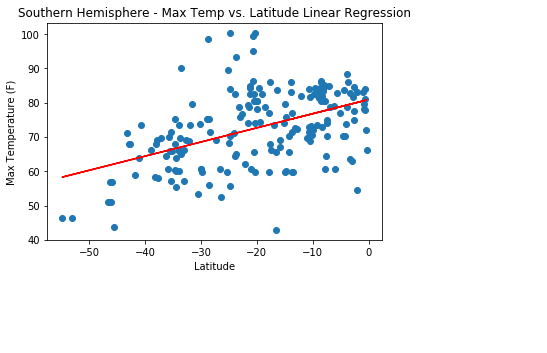

In [39]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, temperature increases as you get closer to the equator.")
plt.savefig("SH_Max Temp_vs_Latitude_LR.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.26x + 59.63
The r-squared is: 0.22944960081521842
There is not much correlation among data points.


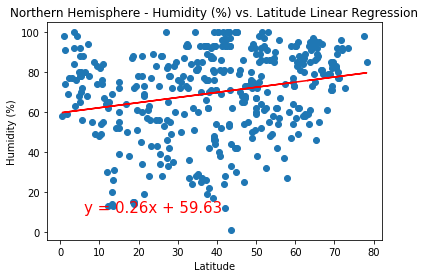

In [40]:

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("NH_Humidity_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.37x + 83.33
The r-squared is: 0.25673627147496225
There is not much correlation among data points.


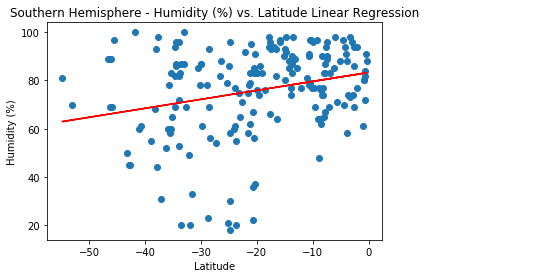

In [41]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("SH_Humidity_vs_Latitude_LR.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.46x + 34.41
The r-squared is: 0.21946069357983689
There is not much correlation among data points.


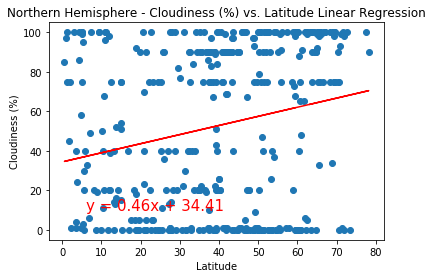

In [42]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("NH_Cloudiness_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.42x + 65.18
The r-squared is: 0.14366738715999702
There is not much correlation among data points.


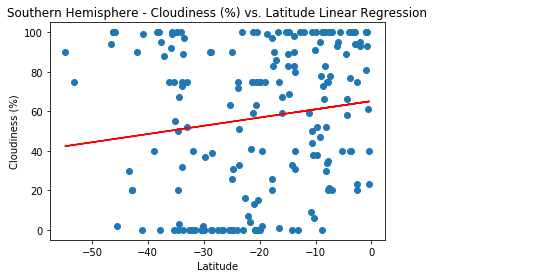

In [43]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("SH_Cloudiness_vs_Latitude_LR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.08x + 6.27
The r-squared is: 0.24038477598939997
There is not much correlation among data points.


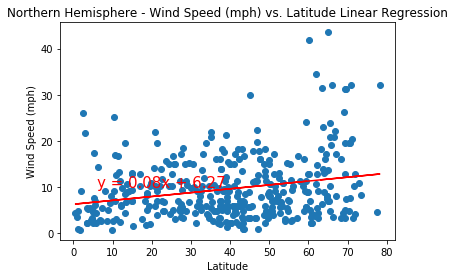

In [44]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("NH_Wind Speed_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.16x + 3.79
The r-squared is: -0.39891649044218663
There is not much correlation among data points.


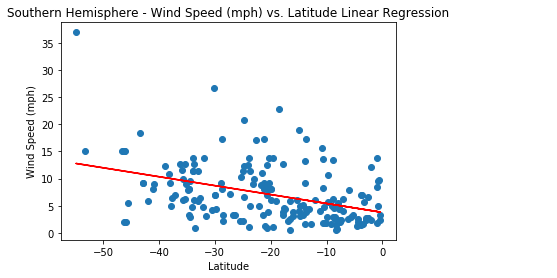

In [45]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("SH_Wind Speed_vs_Latitude_LR.png")
plt.show()